# ソルバーを使わないで微分方程式を解く
扱う微分方程式はsolver~と同じです．  

In [33]:
import matplotlib.pyplot as plt  # グラフを作るとき使う
import numpy as np

## オイラー法
一番簡単な常微分方程式の初期値問題の解き方．  
次のような微分方程式を考える．  
<br>
<img src="https://latex.codecogs.com/svg.image?\dot{x}&space;=&space;f(t,&space;x),&space;\;\;x(t_0)=x_0" title="\dot{x} = f(t, x), \;\;x(t_0)=x_0" />  
<br>
簡単のため微分方程式が時間に依存しないとする．  
<br>
<img src="https://latex.codecogs.com/svg.image?\dot{x}&space;=&space;f(x),&space;\;\;x(t_0)=x_0" title="\dot{x} = f(x), \;\;x(t_0)=x_0" />  
<br>
オイラー法では次の式で解を初期値から更新していく．  
<br>
<img src="https://latex.codecogs.com/svg.image?x_{n&plus;1}&space;=&space;x_{n}&space;&plus;&space;f(x_n)\Delta{}t,\;\;&space;t_n&space;<&space;T" title="x_{n+1} = x_{n} + f(x_n)\Delta{}t,\;\; t_n < T" />  
<br>
ここで<img src="https://latex.codecogs.com/svg.image?\Delta{}t" title="\Delta{}t" />は刻み時間であり，<img src="https://latex.codecogs.com/svg.image?T" title="T" />は終了時間はである．
<br>

まずは簡単な一次元の微分方程式から考える．  
<br>
<img src="https://latex.codecogs.com/png.image?\dpi{120}&space;\bg_white&space;\dot{x}=ax" title="\bg_white \dot{x}=ax" />  
<br>
微分方程式を定義する．  

In [34]:
def dX(x): return x

forループを使って実装する．  

In [35]:
x = []  # 解xを格納する空のリスト
t = []  # 時刻tnを格納するリスト

# 初期値代入
x.append(1)
t.append(0)

dt = 0.1  # 刻み時間

for i in range(50):
    x_next = x[i] + dX(x[i]) * dt  # オイラー法で解を更新
    
    # 解を格納
    x.append(x_next)
    t.append(t[i] + dt)

解をプロットしてみる．  

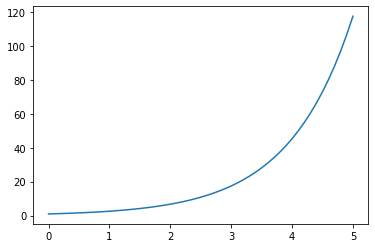

In [36]:
plt.plot(t, x)

### 解析解と比較
上記の微分方程式には厳密解がある．  
<br>
<img src="https://latex.codecogs.com/svg.image?x&space;=&space;Ce^{t}" title="x = Ce^{t}" />  
<br>


数値解`x`と厳密解を同時にプロットしてみる．  

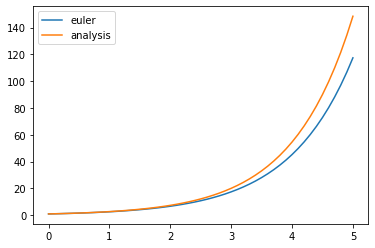

In [37]:
x_anal = np.exp(t)  # 厳密解

plt.plot(t, x, label = 'euler')
plt.plot(t, x_anal, label="analysis")
plt.legend()

オイラー法で求めた数値解はかなり誤差が大きいことがわかる．

****
## ルンゲクッタ法
シミュレーションで一般に使われるのはルンゲクッタ法です．  
ルンゲクッタの更新式は以下の通り．  
<br>
<img src="https://latex.codecogs.com/svg.image?x_{n&plus;1}&space;=&space;x_n&space;&plus;&space;\frac{\Delta{}t}{6}(k_1&space;&plus;&space;2k_2&space;&plus;&space;2k_3&space;&plus;&space;k_4)\\\\k_1&space;=&space;f(x_n)\\\\k_2&space;=&space;f(x_n&space;&plus;&space;\frac{\Delta{}t}{2}k_1)\\\\k_3&space;=&space;&space;f(x_n&space;&plus;&space;\frac{\Delta{}t}{2}k_2)\\\\k_4&space;=&space;f(xn&space;&plus;&space;\Delta{}tk_3)" title="x_{n+1} = x_n + \frac{\Delta{}t}{6}(k_1 + 2k_2 + 2k_3 + k_4)\\\\k_1 = f(x_n)\\\\k_2 = f(x_n + \frac{\Delta{}t}{2}k_1)\\\\k_3 = f(x_n + \frac{\Delta{}t}{2}k_2)\\\\k_4 = f(xn + \Delta{}tk_3)" />  
<br>
導出は自分で調べてください．  
<br>
ルンゲクッタ法をforループを使って実装する．  

In [40]:
x_rk = []  # 解xを格納する空のリスト
t = []  # 時刻tnを格納するリスト

# 初期値代入
x_rk.append(1)
t.append(0)


for i in range(50):
    # 係数を計算
    k1 = dX(x_rk[i])
    k2 = dX(x_rk[i] + dt/2*k1)
    k3 = dX(x_rk[i] + dt/2*k2)
    k4 = dX(x_rk[i] + dt*k3)
    
    x_next = x_rk[i] + dt/6*(k1 + 2*k2 + 2*k3 + k4)  # 解を更新
    
    # 解を格納
    x_rk.append(x_next)
    t.append(t[i] + dt)

プロットしてみる．  

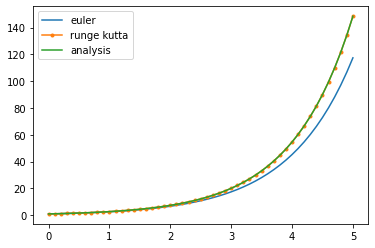

In [43]:
plt.plot(t, x, label = 'euler')
plt.plot(t, x_rk, label="runge kutta", marker=".")
plt.plot(t, x_anal, label="analysis")
plt.legend()

オイラー法と異なり，ルンゲクッタ法ではかなり厳密解に近い解が得られていることがわかる．  